In [24]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas
import sys

sys.path.append("../src")
import localmodule

  0.1% of the intervals are below      3 ms
  1.0% of the intervals are below     29 ms
 10.0% of the intervals are below    142 ms
 15.0% of the intervals are below    204 ms
 20.0% of the intervals are below    290 ms
 25.0% of the intervals are below    395 ms
 30.0% of the intervals are below    529 ms
 50.0% of the intervals are below   1694 ms
 75.0% of the intervals are below   5360 ms
 99.0% of the intervals are below  72634 ms
 99.9% of the intervals are below 203242 ms


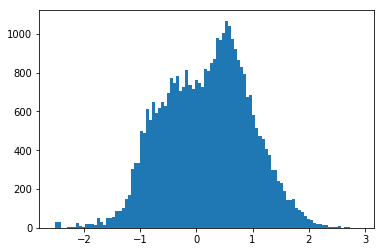

In [101]:
data_dir = "/Users/vl238/spl2017_data"
dataset_name = localmodule.get_dataset_name()
annotations_name = "_".join([dataset_name, "annotations"])
annotations_dir = os.path.join(data_dir, annotations_name)
units = localmodule.get_units()
intervals = []

for unit_str in units:
    annotation_path = os.path.join(annotations_dir, unit_str + ".txt")
    df = pandas.read_csv(annotation_path, "\t")
    begin_times = np.array(df["Begin Time (s)"])
    end_times = np.array(df["End Time (s)"])
    mid_times = 0.5 * (begin_times + end_times)
    unit_intervals = np.diff(sorted(mid_times))
    intervals.append(np.maximum(unit_intervals, 0.003))
    
intervals = np.concatenate(intervals)

%matplotlib inline
plt.hist(np.log10(intervals), bins=100);

percents = [0.1, 1.0, 10.0, 15.0, 20.0, 25.0, 30.0, 50.0, 75.0, 99.0, 99.9]
percentiles = np.percentile(intervals, percents) * 1000
percentiles_str = [str(percentile) for percentile in percentiles]

for percent, percentile in zip(percents, percentiles):
    percent_str = str(percent).rjust(5)
    percentile_str = str(int(percentile)).rjust(6)
    print("{}% of the intervals are below {} ms".format(percent_str, percentile_str))

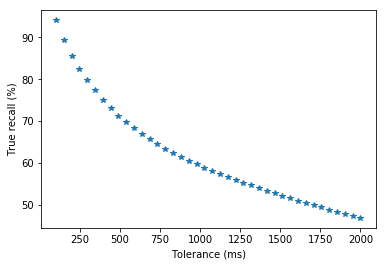

In [99]:
n_intervals = len(intervals)
tolerances = np.linspace(0.1, 2.0, 40)
recalls = np.array([np.sum(intervals > tol)/n_intervals for tol in tolerances])
plt.plot(1000*tolerances, 100*recalls, "*")
plt.xlabel("Tolerance (ms)")
plt.ylabel("True recall (%)")